In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import numpy as np
import cartopy
import cartopy.crs as ccrs
# Resolve the latest HRRR dataset
from siphon.catalog import get_latest_access_url
from siphon.ncss import NCSS
import os
import xarray as xr
north=41
south=39
east=-104
west=-106
var=[
    'u-component_of_wind_height_above_ground',
    'v-component_of_wind_height_above_ground',
    'u-component_of_wind_isobaric',
    'v-component_of_wind_isobaric',
    'Geopotential_height_surface',
    'Temperature_height_above_ground',
    'Temperature_isobaric',
    'Total_cloud_cover_entire_atmosphere',
    'Hourly_Maximum_of_Upward_Vertical_Velocity_in_the_lowest_400hPa_pressure_difference_layer_1_Hour_Maximum',
    'Convective_available_potential_energy_surface',
    'Surface_lifted_index_isobaric_layer',
]

In [2]:
# latest_hrrr_ncss = get_latest_access_url("http://thredds.ucar.edu/thredds/catalog/grib/NCEP/HRRR/CONUS_2p5km/catalog.xml", "NetcdfSubset") # HRRR 2.5km model +18hrs
# #latest_hrrr_ncss = get_latest_access_url("https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/catalog.xml", "NetcdfSubset")
# print(latest_hrrr_ncss)
# ncss = NCSS(latest_hrrr_ncss)
# # Create a query to ask for all times in netcdf4 format for
# query = ncss.query()
# query.accept('netcdf4')
# query.all_times()
# query.lonlat_box(north=north, south=south, east=east, west=west)
# query.variables(frozenset(var))

# # Get the raw bytes and write to a file.
# data = ncss.get_data_raw(query)
# with open('temp.nc4', 'wb') as outf:
#     outf.write(data)
# #Try reading extracted data with Xarray
nc = xr.load_dataset('temp.nc4')
nc

<xarray.Dataset>
Dimensions:                                                                                                   (height_above_ground1: 1, height_above_ground3: 2, isobaric: 5, isobaric_layer: 1, pressure_difference_layer3: 1, time: 19, time1: 18, x: 77, y: 96)
Coordinates:
  * time                                                                                                      (time) datetime64[ns] ...
  * height_above_ground1                                                                                      (height_above_ground1) float32 ...
  * y                                                                                                         (y) float32 ...
  * x                                                                                                         (x) float32 ...
  * isobaric                                                                                                  (isobaric) float32 ...
  * height_above_ground3                                                                                      (height_above_ground3) float32 ...
  * isobaric_layer                                                                                            (isobaric_layer) float32 ...
  * time1                                                                                                     (time1) datetime64[ns] ...
  * pressure_difference_layer3                                                                                (pressure_difference_layer3) float32 ...
Data variables:
    Temperature_height_above_ground                                                                           (time, height_above_ground1, y, x) float32 ...
    LambertConformal_Projection                                                                               int32 ...
    v-component_of_wind_isobaric                                                                              (time, isobaric, y, x) float32 ...
    u-component_of_wind_height_above_ground                                                                   (time, height_above_ground3, y, x) float32 ...
    u-component_of_wind_isobaric                                                                              (time, isobaric, y, x) float32 ...
    v-component_of_wind_height_above_ground                                                                   (time, height_above_ground3, y, x) float32 ...
    Surface_lifted_index_isobaric_layer                                                                       (time, isobaric_layer, y, x) float32 ...
    Geopotential_height_surface                                                                               (time, y, x) float32 ...
    Total_cloud_cover_entire_atmosphere                                                                       (time, y, x) float32 ...
    Convective_available_potential_energy_surface                                                             (time, y, x) float32 ...
    Temperature_isobaric                                                                                      (time, isobaric, y, x) float32 ...
    Hourly_Maximum_of_Upward_Vertical_Velocity_in_the_lowest_400hPa_pressure_difference_layer_1_Hour_Maximum  (time1, pressure_difference_layer3, y, x) float32 ...
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                     

In [3]:
nc = xr.load_dataset('temp.nc4')

ncvar = nc[var[0]]
grid = nc[ncvar.grid_mapping]
print(grid)
lon0 = grid.longitude_of_central_meridian
lat0 = grid.latitude_of_projection_origin
lat1 = grid.standard_parallel
earth_radius = grid.earth_radius
#Try plotting the LambertConformal data with Cartopy

#cartopy wants meters, not km
x = ncvar.x.data*1000.
y = ncvar.y.data*1000.
#globe = ccrs.Globe(ellipse='WGS84') #default
globe = ccrs.Globe(ellipse='sphere', semimajor_axis=grid.earth_radius)

crs = ccrs.LambertConformal(
                              central_longitude=lon0, 
                              central_latitude=lat0, 
                              standard_parallels=(lat0,lat1), 
                              globe=globe
                             )

# find the correct time dimension name
for d in ncvar.dims:
    if "time" in d: 
        timevar = d

print(timevar)
print(nc[timevar].data[0])

<xarray.DataArray 'LambertConformal_Projection' ()>
array(0, dtype=int32)
Attributes:
    grid_mapping_name:              lambert_conformal_conic
    latitude_of_projection_origin:  25.0
    longitude_of_central_meridian:  265.0
    standard_parallel:              25.0
    earth_radius:                   6371229.0
    _CoordinateTransformType:       Projection
    _CoordinateAxisTypes:           GeoX GeoY
time
2021-04-05T18:00:00.000000000


2021-04-05T19:00:00.000000000
(77,)
(96,)
(96, 77)


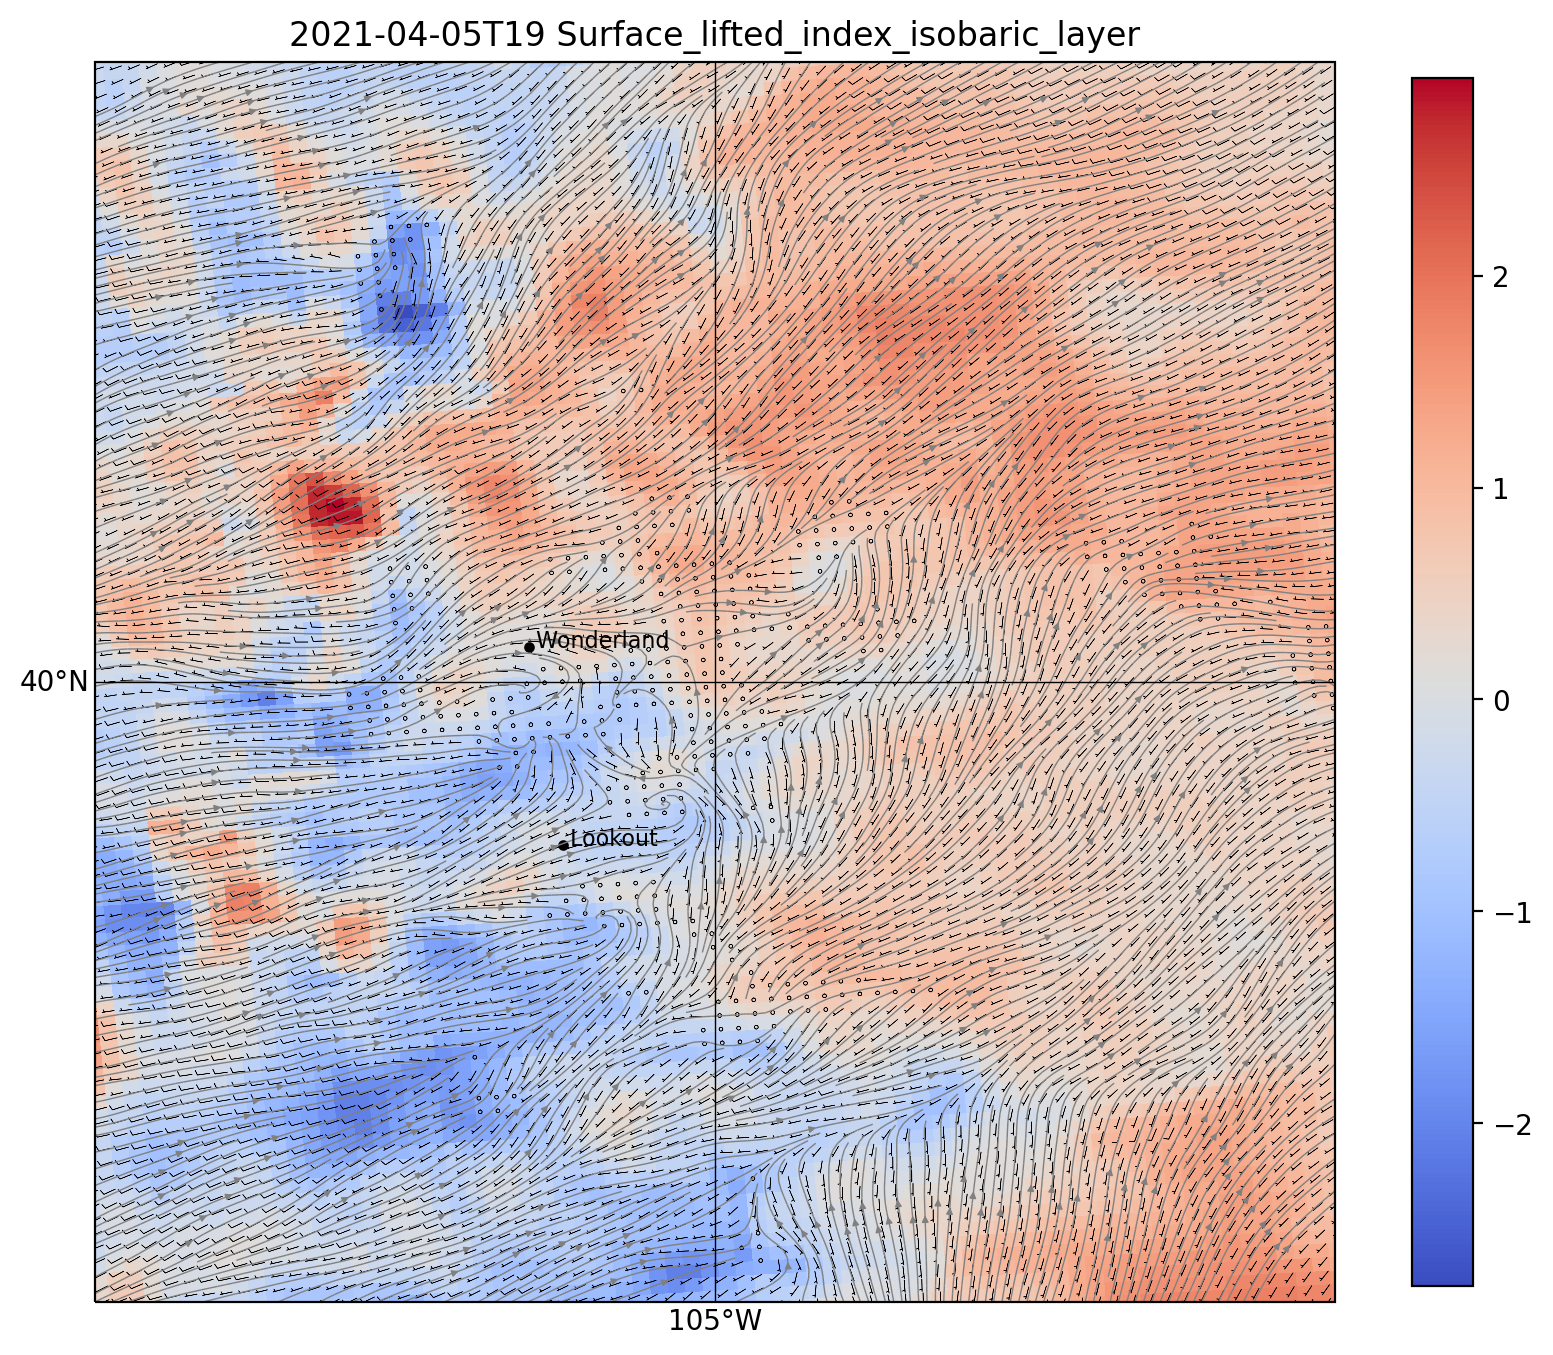

In [15]:
#numpy.datetime64('2020-09-04T20:00:00.000000000')
ncvar = nc[var[-1]]
ncname = ncvar.name
istep = 1
barbs = False
streamlines = True
print(nc[timevar].data[istep])
fig = plt.figure(figsize=(10,10), dpi=200)
ax = plt.axes(projection=ccrs.PlateCarree())
plt.xlim([west,east])
plt.ylim([south, north])
print(x.data.shape)
print(y.data.shape)
print(nc[var[4]][0,::].data.squeeze().shape)
mesh = ax.pcolorfast(x,y,ncvar[istep,::].data.squeeze(), transform=crs, cmap='coolwarm')
ax.barbs(x,y,nc[var[0]][istep,0,::].data.squeeze(),nc[var[1]][istep,0,::].data.squeeze(), transform=crs, length=3, linewidth=0.2)
ax.streamplot(x,y,nc[var[0]][istep,0,::].data.squeeze(),nc[var[1]][istep,0,::].data.squeeze(), transform=crs, density = 5, color='grey', arrowsize=0.5, linewidth= 0.5)
ax.scatter(-105.300, 40.056, c='black', s=8)
ax.text(-105.300, 40.056, ' Wonderland', size=8, alpha=1)
# ax.scatter(-105.282, 40.133, c='black', s=8)
# ax.text(-105.282, 40.13, ' Altona', size=8, alpha=1)
ax.scatter(-105.245, 39.737, c='black', s=8)
ax.text(-105.245, 39.737, ' Lookout', size=8, alpha=1)
# ax.scatter(-105.271, 40.224, c='black', s=8)
# ax.text(-105.271, 40.224, ' Lyons', size=8, alpha=1)
# ax.scatter(-105.419, 40.026, c='black', s=8)
# ax.text(-105.419, 40.026, ' Sugarloaf', size=8, alpha=1)
gl = ax.gridlines(draw_labels=True, color = 'black', linewidth=0.5)
grid_size = 1
gl.xlocator = mticker.FixedLocator(np.arange(west,east+grid_size,grid_size))
gl.ylocator = mticker.FixedLocator(np.arange(south,north+grid_size,grid_size))
gl.top_labels = False
gl.right_labels = False
plt.colorbar(mesh, shrink=0.8)
plt.title(str(nc[timevar].data[istep])[:-16] + ' ' + ncname[:42]);
plt.show()

/Users/akootz/.conda/envs/oop_tutorial/lib/python3.8/site-packages/cartopy/vector_transform.py:62: RuntimeWarning: divide by zero encountered in true_divide
  points = np.column_stack([(x.ravel() - x0) / xr, (y.ravel() - y0) / yr])


QhullError: QH6019 qhull input error (qh_scalelast): can not scale last coordinate to [   0,  inf].  Input is cocircular or cospherical.   Use option 'Qz' to add a point at infinity.

While executing:  | qhull d Qc Qbb Q12 Qz Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 813858160  delaunay  Qcoplanar-keep  Qbbound-last  Q12-allow-wide
  Qz-infinity-point  Qtriangulate  _pre-merge  _zero-centrum  Qinterior-keep
  Pgood  _maxoutside  0


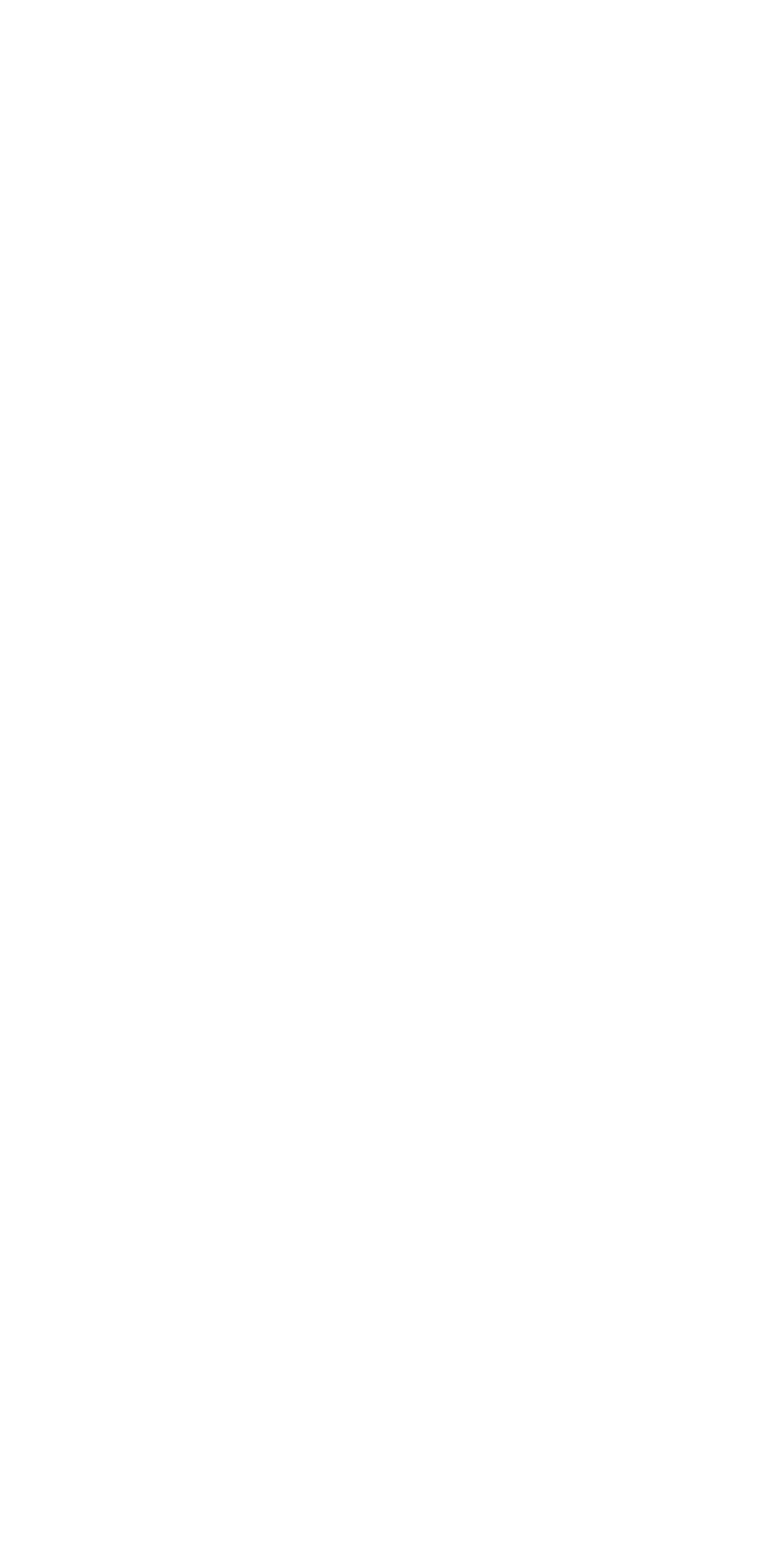

In [14]:
ncvar = nc[var[-1]]
ncname = ncvar.name
time_i = 1
barbs = False
streamlines = True
nctime = 'time'
x = ncvar.x.data*1000.
y = ncvar.y.data*1000.

grid = nc[ncvar.grid_mapping]
crs = ccrs.LambertConformal(
                            central_longitude=grid.longitude_of_central_meridian, 
                            central_latitude=grid.latitude_of_projection_origin, 
                            standard_parallels=(grid.latitude_of_projection_origin,grid.standard_parallel), 
                            globe=ccrs.Globe(ellipse='sphere', semimajor_axis=grid.earth_radius)
                            )

fig = plt.figure(figsize=(10,10), dpi=200)
ax = plt.axes(projection=ccrs.PlateCarree())
mesh = ax.pcolorfast(x,y,ncvar[time_i,::].data.squeeze(), transform=crs, cmap='coolwarm')


#ax.barbs(x,y,nc[var[0]][time_i,0,::].data.squeeze(),nc[var[1]][time_i,0,::].data.squeeze(), transform=crs, length=3, linewidth=0.2)

ax.streamplot(x,y,nc[var[0]][time_i,0,::].data.squeeze(),nc[var[1]][time_i,0,::].data.squeeze(), transform=crs, density = 5, color='grey', arrowsize=0.5, linewidth= 0.5)
#ax.streamplot(x,y,nc[var[0]][istep,0,::].data.squeeze(),nc[var[1]][istep,0,::].data.squeeze(), transform=crs, density = 5, color='grey', arrowsize=0.5, linewidth= 0.5)



ax.scatter(-105.300, 40.056, c='black', s=8)
ax.text(-105.300, 40.056, ' Wonderland', size=8)
ax.scatter(-105.245, 39.737, c='black', s=8)
ax.text(-105.245, 39.737, ' Lookout', size=8)
# ax.scatter(-105.282, 40.133, c='black', s=8)
# ax.text(-105.282, 40.13, ' Altona', size=8)
# ax.scatter(-105.271, 40.224, c='black', s=8)
# ax.text(-105.271, 40.224, ' Lyons', size=8)
# ax.scatter(-105.419, 40.026, c='black', s=8)
# ax.text(-105.419, 40.026, ' Sugarloaf', size=8)

gl = ax.gridlines(draw_labels=True, color = 'black', linewidth=0.5)
gl.xlocator = mticker.FixedLocator(np.arange(west,east+grid_size,grid_size))
gl.ylocator = mticker.FixedLocator(np.arange(south,north+grid_size,grid_size))
gl.top_labels = False
gl.right_labels = False

plt.xlim([west, east])
plt.ylim([south, north])
plt.colorbar(mesh, shrink=0.8)
plt.title(str(nc[nctime].data[time_index])[:-16] + ' ' + ncname[:42]);
plt.show()